<a href="https://colab.research.google.com/github/NikhithaVarma/ML-Algos/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset=pd.read_csv("student_scores.csv")

In [ ]:
dataset.shape

(25, 2)

In [ ]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
q1=dataset.Hours.quantile(0.25)
q2=dataset.Hours.quantile(0.50)
q3=dataset.Hours.quantile(0.75)
iqr=q3-q1
upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-4.3500000000000005
14.450000000000001


there are no outliers in the data

In [ ]:
dataset.isnull().sum()  

Hours     0
Scores    0
dtype: int64

there are no null values

In [ ]:
dataset = dataset.drop_duplicates()
dataset.shape

(25, 2)

there are no duplicates also...cleaning is done and now we can do EDA

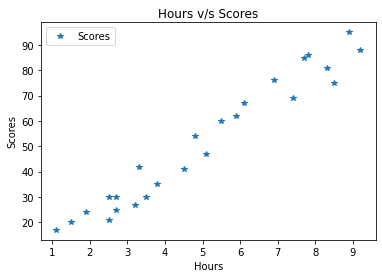

In [ ]:
dataset.plot(x="Hours",y="Scores",style="*")
plt.title("Hours v/s Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()


there is a relation b/w hours and score and it is linear relation, so there is no need for tranformation

In [ ]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
#there is no need of encoding the data as it is in continous 
dataset.Scores.values

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

**Preparing the data**

In [ ]:
#split the data
X=dataset.loc[:,["Hours"]].values
y=dataset.loc[:,["Scores"]].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
X_test

array([[8.3],
       [5.9],
       [2.7],
       [5.1],
       [3.5]])

In [ ]:
y_test

array([[81],
       [62],
       [30],
       [47],
       [30]])

In [ ]:
X_train.shape, X_test.shape

((20, 1), (5, 1))

**Model**

In [ ]:
#Model for algorithm - score = (m * hours) + c

from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

[3.06193096]


In [ ]:
print(regressor.coef_) # slope - m

# predicted score  = 9.91 * (hours) + 1.68

[[9.77716814]]


In [ ]:
regressor.predict([[7.5]])

array([[76.39069204]])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([[84.21242656],
       [60.74722301],
       [29.46028495],
       [52.9254885 ],
       [37.28201947]])

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

ValueError: ignored

In [ ]:
regressor.predict([[12]]) # perils of extrapolation

array([[120.176019]])

**Metrics**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.9475863906424014


0.9475863906424014

**Multiple Linear Regression**

In [ ]:
import pandas as pd
dataset = pd.read_csv('petrol_consumption.csv')

In [ ]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
dataset.isnull().sum() #checking the null values

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [ ]:
dataset.dtypes #checking data is in correct format or not

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

In [ ]:
dataset.shape

(48, 5)

In [ ]:
dataset=dataset.drop_duplicates()

In [ ]:
dataset.shape

(48, 5)

In [ ]:
#checking for outliers 
#for paved_highways column
iqr = dataset.Paved_Highways.quantile(0.75) - dataset.Paved_Highways.quantile(0.25)
upper_threshold = dataset.Paved_Highways.quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset.Paved_Highways.quantile(0.25) - (1.5 * iqr)
print(lower_threshold)
print(upper_threshold)

-2958.375
13224.625


there is no value less than lower threshold but there are some values greater than upper threshold, so there are outliers...and we need to remove them using capping

In [ ]:
dataset.Paved_Highways = dataset.Paved_Highways.clip(-2958, 13224)

In [ ]:
dataset.shape

(48, 5)

**EDA**

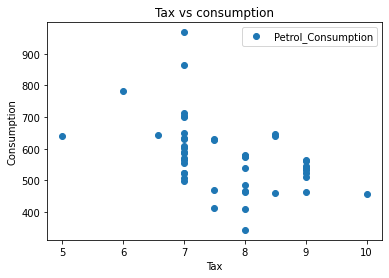

In [ ]:
#we compare every feature with the target
#we use scatter plot comparing 2 cont variables
import matplotlib.pyplot as plt
dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
#there is no relation here but mutiple countires have same tax so we can group them
dataset.groupby("Petrol_tax")["Petrol_Consumption"].mean()

Petrol_tax
5.00     640.000000
6.00     782.000000
6.58     644.000000
7.00     631.736842
7.50     536.000000
8.00     502.000000
8.50     582.666667
9.00     530.875000
10.00    457.000000
Name: Petrol_Consumption, dtype: float64

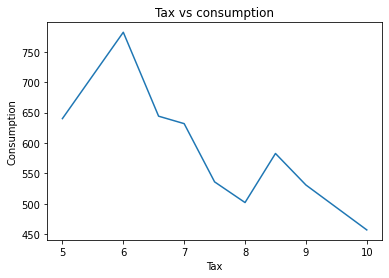

In [ ]:
#we can now plot this data to check whether there is any relation or not
dataset.groupby("Petrol_tax")["Petrol_Consumption"].mean().plot()
import matplotlib.pyplot as plt
#dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [ ]:
#we can check corr to check if there is linear relation or not
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.00000,-0.45128
Petrol_Consumption,-0.45128,1.00000


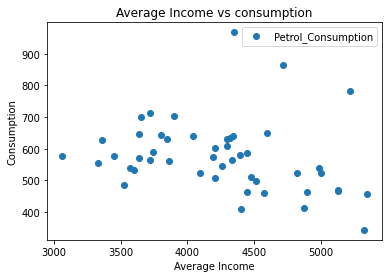

In [ ]:
#corr is -0.45 so there is -ve linear relation, so there is no need for tranformation
#As tax increases, comsumption decreases which is in-line with our GK
#now we plot another feature with target
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()

In [ ]:
#there is -ve linear relation,also we can check corr
dataset[['Average_income','Petrol_Consumption']].corr()

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [ ]:
#No transformation reqd 
#The direction of relatiohsnip is not in-line with our GK


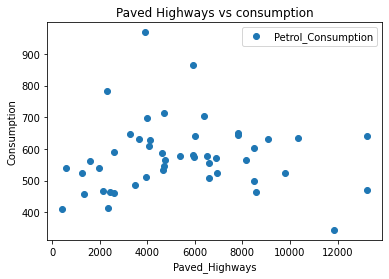

In [ ]:
#we plot for another feature(paved_highways)
dataset.plot(x='Paved_Highways', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Paved_Highways')
plt.ylabel('Consumption')
plt.show()


In [ ]:
dataset[['Paved_Highways','Petrol_Consumption']].corr()


,Paved_Highways,Petrol_Consumption
Paved_Highways,1.000000,0.009854
Petrol_Consumption,0.009854,1.000000


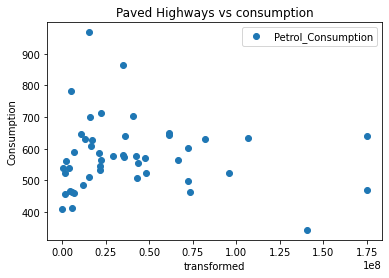

,transformed,Petrol_Consumption
transformed,1.000000,-0.090404
Petrol_Consumption,-0.090404,1.000000


In [ ]:
#corr is 0.009 so there is no linear relation
#so now we have to transform the data...we can try x^2
import numpy as np
dataset['transformed'] = np.square(dataset['Paved_Highways']) # transformation of x to (x)^2
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('transformed')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()


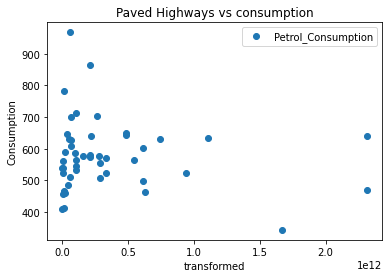

,transformed,Petrol_Consumption
transformed,1.00000,-0.13457
Petrol_Consumption,-0.13457,1.00000


In [ ]:
#there is no linear relation we can try x^3
import numpy as np
dataset['transformed'] = np.power(dataset['Paved_Highways'],3) # transformation of x to (x)^2
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('transformed')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()


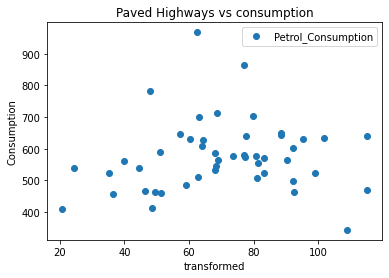

,transformed,Petrol_Consumption
transformed,1.000000,0.084755
Petrol_Consumption,0.084755,1.000000


In [ ]:
#there is no linear relation we can try sqrt(x)
import numpy as np
dataset['transformed'] = np.sqrt(dataset['Paved_Highways']) # transformation of x to (x)^2
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('transformed')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

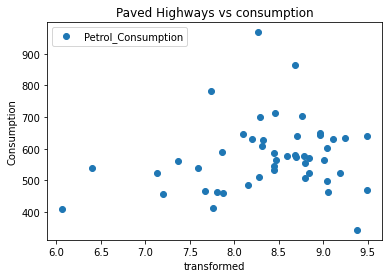

,transformed,Petrol_Consumption
transformed,1.000000,0.165335
Petrol_Consumption,0.165335,1.000000


In [ ]:
#there is no linear relation we can try log(x)
import numpy as np
dataset['transformed'] = np.log(dataset['Paved_Highways']) # transformation of x to log(x)
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('transformed')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


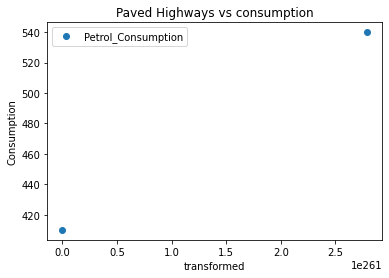

,transformed,Petrol_Consumption
transformed,NaN,0.0
Petrol_Consumption,0.0,1.0


In [ ]:
#there is no linear relation we can try e(x)
import numpy as np
dataset['transformed'] = np.exp(dataset['Paved_Highways']) # transformation of x to exponent
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('transformed')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

there is no linear relationship b/w highways and consumption even after transformation...so we can drop the feature

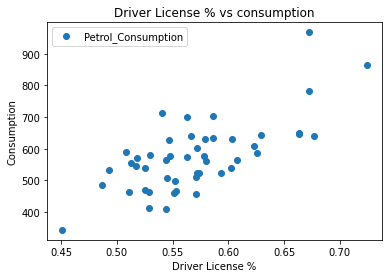

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.698965
Petrol_Consumption,0.698965,1.000000


In [ ]:
#now last feature
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

In [ ]:
#there is a +ve linear relation..so there is no need of transforming
#also there is no need of encode
#we can split the data

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
##its good to scale the data
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Model**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Petrol_tax,-24.650408
Average_income,-41.590122
Population_Driver_licence(%),83.241389


In [ ]:
regressor.intercept_ # c 

#the model is:
# petrol_consumption = -24.65 *scaled_petrol_tax + -41.59 * scaled_avg_income +  83.24 * scaled_pop_driver + 574.97

574.9736842105262

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,566,545.588030
1,640,724.232294
2,649,721.695268
3,574,567.612807
4,631,629.210350
5,540,573.382476
6,648,751.641958
7,498,552.359634
8,487,494.043387
9,603,605.340953


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#r2-score is >0,so it is good model

R2- SCORE: 0.16522749830207017
